In [36]:
!pip install lightgbm
!pip install imbalanced-learn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [344]:
#Importing the required libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import lightgbm as lgb
import re
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from lightgbm import LGBMClassifier
import scipy.stats
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [40]:
path = 'C:\\Users\\mahim\\Downloads\\Fall module 2\\MA\\'

In [44]:
data = pd.read_csv(path + 'bank-additional-full.csv',sep=';')

In [45]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
# bank client data: age, job, marital, education, default, housing, loan
# related with the last contact of the current campaign- contact,month, day_of_week, duration
# other attributes: campaign, pdays, previous, poutcome, 
# social and economic context attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
data.shape

(41188, 21)

# Data Cleaning

## Checking for nulls

In [48]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Checking for duplicate rows


In [49]:
dup_data=data[data.duplicated()==True]
dup_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


### There are 12 duplicate rows in our dataset. Hence we can keep only the last instance and remove the duplicates

In [50]:
data_cleaned=data.drop_duplicates(keep='last')

In [51]:
data_cleaned

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [52]:
data_cleaned.shape

(41176, 21)

## Outlier Analysis

In [53]:
numdata=data_cleaned.select_dtypes(['int64','float64'])

In [54]:
numdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Getting the box plot of all numerical variables

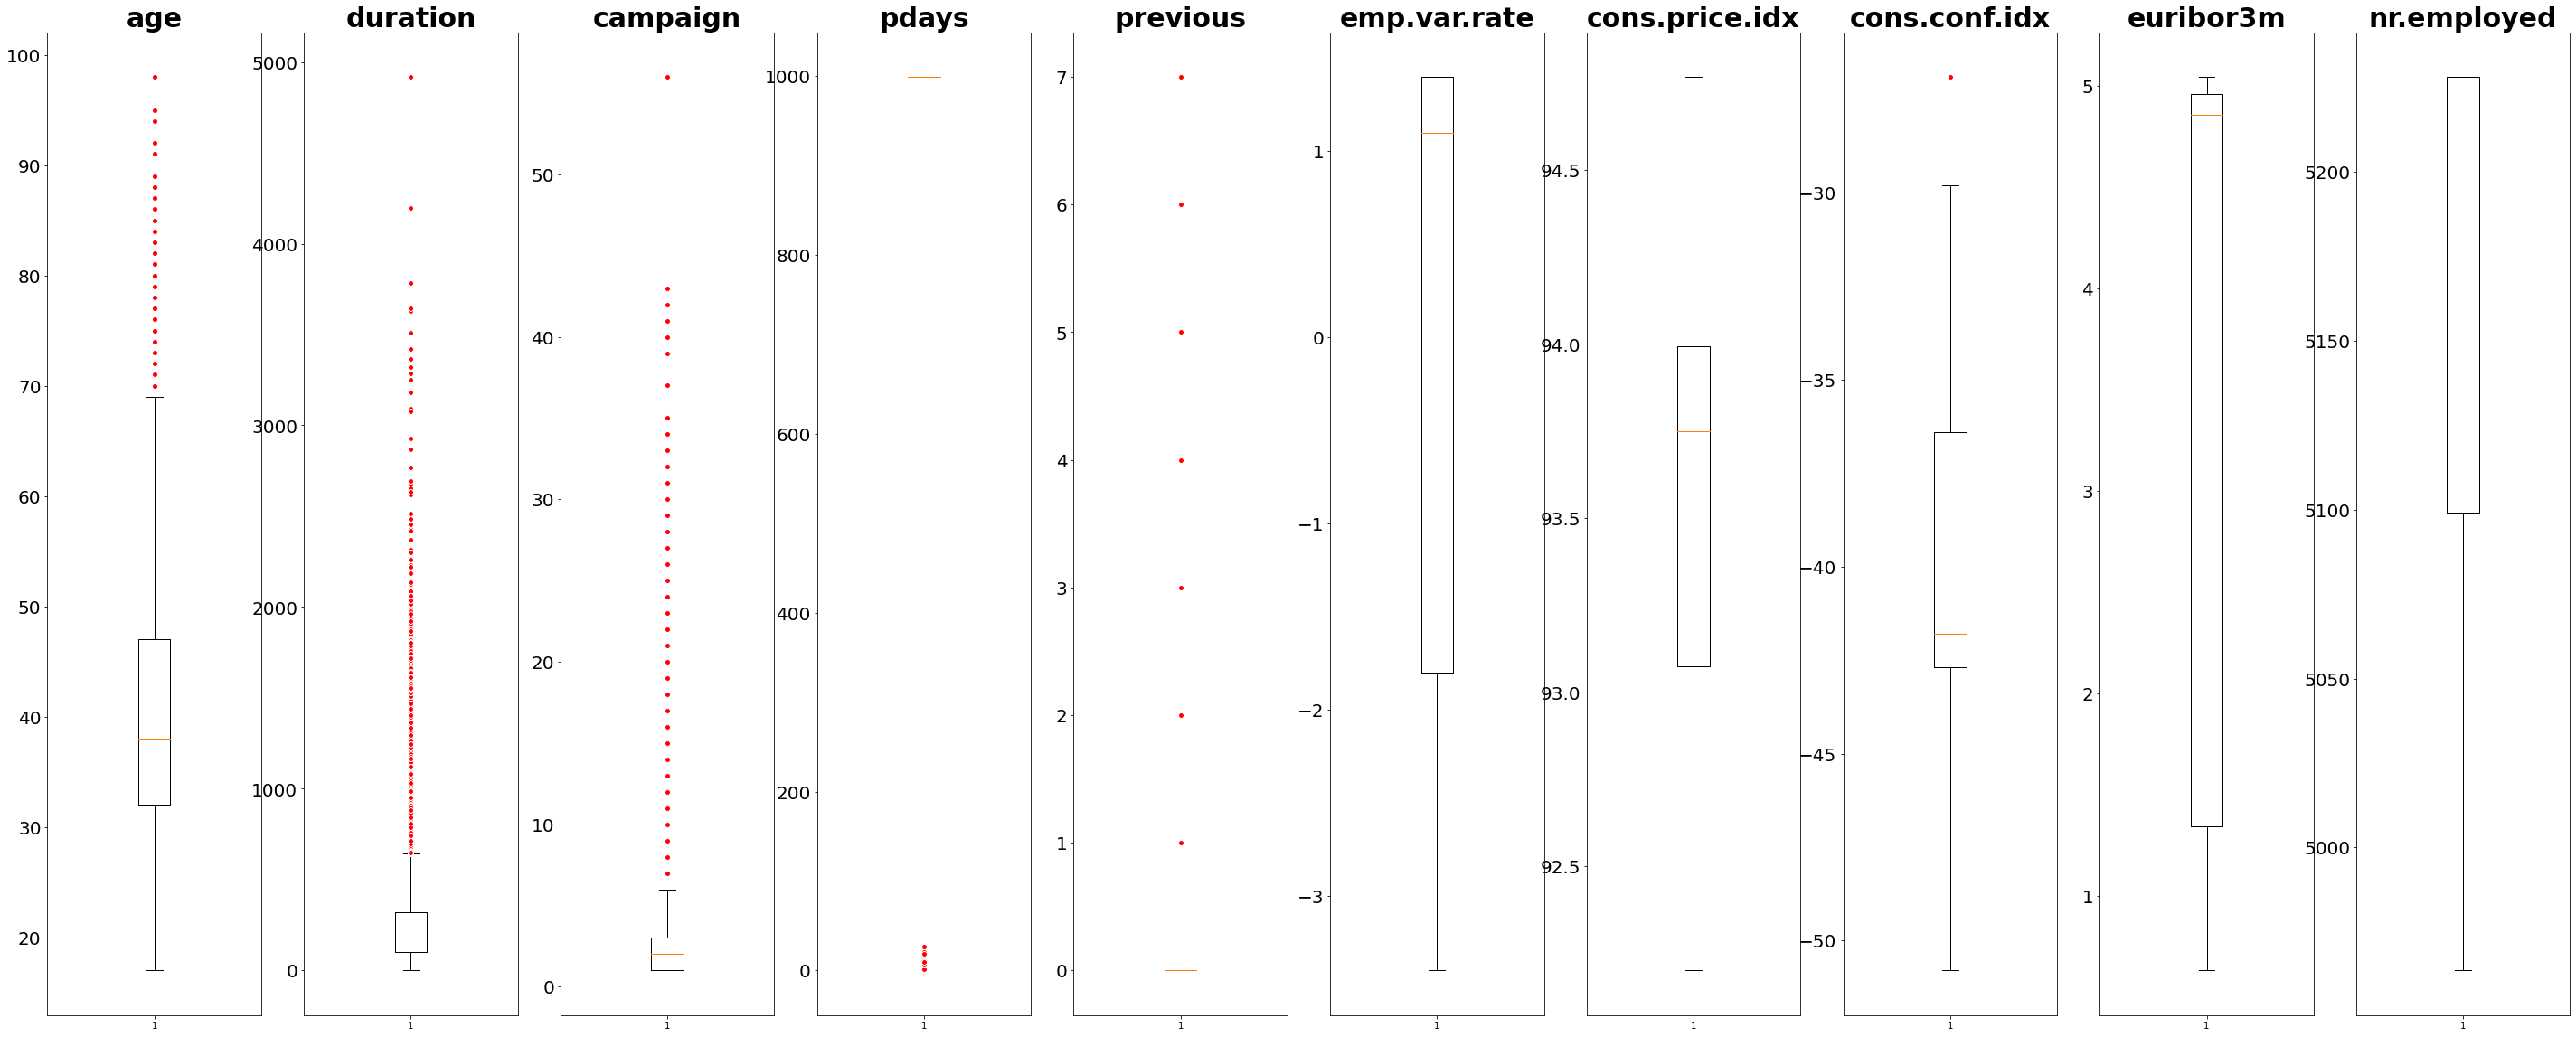

In [55]:
fig, axs = plt.subplots(1, len(numdata.columns), figsize=(50,20))
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
for i, ax in enumerate(axs.flat):
    ax.boxplot(numdata.iloc[:,i], flierprops=red_circle)
    ax.set_title(numdata.columns[i], fontsize=30, fontweight='bold')
    ax.tick_params(axis='y', labelsize=20)
#sns.boxplot(numdata['age'])

### We can see that Age, duration and campaign variables have few outliers in the data. 

### Analyzing the outliers to determine if they need to be removed

In [56]:
Q1 = data_cleaned['age'].quantile(0.25)
Q3 = data_cleaned['age'].quantile(0.75)
IQR = Q3 - Q1
age_outliers=data_cleaned[(data_cleaned['age']<(Q1-(1.5*IQR))) | (data_cleaned['age']>(Q3+(1.5*IQR)))]
age_outliers['age'].describe()

count    468.000000
mean      76.940171
std        5.759700
min       70.000000
25%       72.000000
50%       76.000000
75%       81.000000
max       98.000000
Name: age, dtype: float64

### There are 468 people who are outliers and they are in the range of 70-98 years. So they need not be removed

In [57]:
Q1 = data_cleaned['duration'].quantile(0.25)
Q3 = data_cleaned['duration'].quantile(0.75)
IQR = Q3 - Q1
duration_outliers=data_cleaned[(data_cleaned['duration']<(Q1-(1.5*IQR))) | (data_cleaned['duration']>(Q3+(1.5*IQR)))]
duration_outliers['duration'].describe()

count    2963.000000
mean      968.217010
std       367.294817
min       645.000000
25%       729.000000
50%       854.000000
75%      1086.000000
max      4918.000000
Name: duration, dtype: float64

### There are 2963 people who are in the range of 645-4918 seconds

In [58]:
Q1 = data_cleaned['campaign'].quantile(0.25)
Q3 = data_cleaned['campaign'].quantile(0.75)
IQR = Q3 - Q1
campaign_outliers=data_cleaned[(data_cleaned['campaign']<(Q1-(1.5*IQR))) | (data_cleaned['campaign']>(Q3+(1.5*IQR)))]
campaign_outliers['campaign'].describe()

count    2406.000000
mean       11.004156
std         5.417610
min         7.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        56.000000
Name: campaign, dtype: float64

### We are not removing any data based on outliers

Numeric variables univariate:

In [63]:
x = [x for x in data_cleaned.columns if data_cleaned[x].dtypes != 'object' and x!='y']

#data_numeric contains only the numeric columns present in the dataset
data_numeric = data_cleaned[x]

In [65]:
data_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [66]:
#Range is the difference between the maximum and minimum value in the data for a single variable.
def Range(y):
            minimum = np.min(y)
            maximum = np.max(y)
            rng = maximum-minimum
            return rng

Rnge = data_numeric.apply(Range)

In [67]:
#Inter-quartile range is the difference between the 75th percentile and 25th percentile.
def iqr(y):
           x25 = np.nanpercentile(y,25)
           x75 = np.nanpercentile(y,75)
           Iqr = x75 - x25
           return Iqr

iQr = data_numeric.apply(iqr)

In [68]:
#Levels are the number of unique values present in a single variable.
def level(y):
            no_of_levels = len(y.unique())
            return no_of_levels

nlevels = data_numeric.apply(level)

In [69]:
#Other measures
mean = data_numeric.apply(np.mean)
median = data_numeric.apply(np.nanmedian,)
stdv = data_numeric.apply(np.std)
missingno = data_numeric.isnull().sum()
missingper=(missingno/data_numeric.shape[0])*100
count = data_numeric.count()

In [70]:
#Calculating minimum and maximum value of every column:

minimum=data_numeric.apply(np.min)
maximum=data_numeric.apply(np.max)

In [71]:
#Percentiles
p1  = data_numeric.quantile(0.01)
p5  = data_numeric.quantile(0.05)
p10 = data_numeric.quantile(0.10)
p20 = data_numeric.quantile(0.20)
p30 = data_numeric.quantile(0.30)
p40 = data_numeric.quantile(0.40)
p50 = data_numeric.quantile(0.50)
p60 = data_numeric.quantile(0.60)
p70 = data_numeric.quantile(0.70)
p80 = data_numeric.quantile(0.80)
p90 = data_numeric.quantile(0.90)
p95 = data_numeric.quantile(0.95)
p99 = data_numeric.quantile(0.99)

In [72]:
Frame = [Rnge,minimum, maximum, p1,p5,p10,p20,p30,p40,p50,p60,p70,p80,p90,p95,p99,iQr,nlevels,mean,median,stdv,missingno,missingper,count]

#Creating a dataframe, it will contain all the results we have derived here.
unistat_numeric = pd.concat(Frame,axis =1)
unistat_numeric.columns = ['Range','minimum','maximum','p1','p5','p10','p20','p30','p40','p50','p60','p70','p80','p90','p95','p99','IQR','nlevels','mean','median','stdv','MissingValue','Missing_perc','# of observations']

In [73]:
unistat_numeric

,Range,minimum,maximum,p1,p5,p10,p20,p30,p40,p50,...,p95,p99,IQR,nlevels,mean,median,stdv,MissingValue,Missing_perc,# of observations
age,81.000,17.000,98.000,23.000,26.000,28.000,31.000,33.00,35.000,38.000,...,58.000,71.000,15.000,78,40.023800,38.000,10.420553,0,0.0,41176
duration,4918.000,0.000,4918.000,11.000,36.000,59.000,89.000,116.00,146.000,180.000,...,753.000,1271.250,217.000,1544,258.315815,180.000,259.302172,0,0.0,41176
campaign,55.000,1.000,56.000,1.000,1.000,1.000,1.000,1.00,1.000,2.000,...,7.000,14.000,2.000,42,2.567879,2.000,2.770285,0,0.0,41176
pdays,999.000,0.000,999.000,3.000,999.000,999.000,999.000,999.00,999.000,999.000,...,999.000,999.000,0.000,27,962.464810,999.000,186.934832,0,0.0,41176
previous,7.000,0.000,7.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,1.000,2.000,0.000,8,0.173013,0.000,0.494958,0,0.0,41176
emp.var.rate,4.800,-3.400,1.400,-3.400,-2.900,-1.800,-1.800,-1.70,-0.100,1.100,...,1.400,1.400,3.200,10,0.081922,1.100,1.570864,0,0.0,41176
cons.price.idx,2.566,92.201,94.767,92.201,92.713,92.893,92.893,93.20,93.444,93.749,...,94.465,94.465,0.919,26,93.575720,93.749,0.578832,0,0.0,41176
cons.conf.idx,23.900,-50.800,-26.900,-49.500,-47.100,-46.200,-46.200,-42.70,-42.000,-41.800,...,-33.600,-26.900,6.300,26,-40.502863,-41.800,4.627804,0,0.0,41176
euribor3m,4.411,0.634,5.045,0.658,0.797,1.046,1.299,1.41,4.191,4.857,...,4.966,4.968,3.617,316,3.621293,4.857,1.734416,0,0.0,41176
nr.employed,264.500,4963.600,5228.100,4963.600,5017.500,5076.200,5099.100,5099.10,5191.000,5191.000,...,5228.100,5228.100,129.000,11,5167.034870,5191.000,72.250487,0,0.0,41176


In [74]:
#Making a missing criteria flag, which is 0 when more than 99% values in a column are missing and 1 otherwise.
unistat_numeric['Missing_criteria_flag'] = np.where(unistat_numeric['Missing_perc']>99,0,1)

In [75]:
#Making a variability flag, which is 1 when 1st percentile(p1) != 99th percentile(p99) and 0 otherwise.
unistat_numeric['Variability_flag'] = np.where(unistat_numeric['p1']==unistat_numeric['p99'],0,1)

In [76]:
#Selecting a variable if both flags are 1. 
unistat_numeric['Select'] = np.where((unistat_numeric['Missing_criteria_flag']==1)&(unistat_numeric['Variability_flag']==1),1,0)

In [77]:
unistat_numeric.head(1)

,Range,minimum,maximum,p1,p5,p10,p20,p30,p40,p50,...,nlevels,mean,median,stdv,MissingValue,Missing_perc,# of observations,Missing_criteria_flag,Variability_flag,Select
age,81.0,17.0,98.0,23.0,26.0,28.0,31.0,33.0,35.0,38.0,...,78,40.0238,38.0,10.420553,0,0.0,41176,1,1,1


In [78]:
unistat_numeric.to_csv(path + 'univariate_analysis_numeric.csv')

Categorical variables univariate:

In [83]:
x = [x for x in data_cleaned.columns if data_cleaned[x].dtypes == 'object']

In [84]:
#data_categorical contains only the categorical columns present in the dataset
data_categorical = data_cleaned[x]

In [85]:
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [86]:
#Levels are the number of unique values present in a single variable.
def level(y):
            no_of_levels = len(y.unique())
            return no_of_levels

nlevels = data_categorical.apply(level)

In [87]:
#Other measures
missingno = data_categorical.isnull().sum()
missingper=(missingno/data_categorical.shape[0])*100
count = data_categorical.count()

In [88]:
Frame = [nlevels,missingno,missingper,count]

#Creating a dataframe, it will contain all the results we have derived here.
unistat_categorical = pd.concat(Frame,axis =1)
unistat_categorical.columns = ['nlevels','MissingValue','Missing_perc','# of observations']

In [89]:
unistat_categorical.head(1)

,nlevels,MissingValue,Missing_perc,# of observations
job,12,0,0.0,41176


In [90]:
#Making a missing criteria flag, which is 0 when more than 99% values in a column are missing and 1 otherwise.
unistat_categorical['Missing_criteria_flag'] = np.where(unistat_categorical['Missing_perc']>99,0,1)

In [91]:
unistat_categorical['Variability_flag'] = np.where(((unistat_categorical['nlevels']<2) | (unistat_categorical['nlevels']>500)) , 0, 1)

In [92]:
#Selecting a variable if both flags are 1. 
unistat_categorical['Select'] = np.where((unistat_categorical['Missing_criteria_flag']==1)&(unistat_categorical['Variability_flag']==1),1,0)

In [93]:
unistat_categorical

,nlevels,MissingValue,Missing_perc,# of observations,Missing_criteria_flag,Variability_flag,Select
job,12,0,0.0,41176,1,1,1
marital,4,0,0.0,41176,1,1,1
education,8,0,0.0,41176,1,1,1
default,3,0,0.0,41176,1,1,1
housing,3,0,0.0,41176,1,1,1
loan,3,0,0.0,41176,1,1,1
contact,2,0,0.0,41176,1,1,1
month,10,0,0.0,41176,1,1,1
day_of_week,5,0,0.0,41176,1,1,1
poutcome,3,0,0.0,41176,1,1,1


In [94]:
unistat_categorical.to_csv(path + 'univariate_analysis_categorical.csv')

No variables to be removed for the analysis. 

# Exploratory Data Analysis

In [100]:
data_cleaned['y_numeric']=np.where(data_cleaned['y']=='yes',1,0)

<AxesSubplot:>

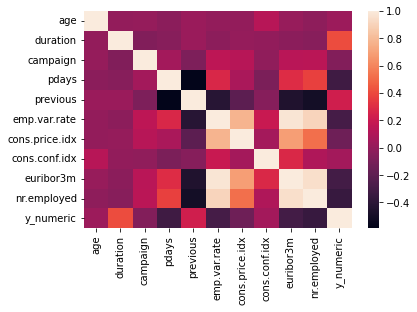

In [101]:
corr_needed=data_cleaned[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y_numeric']]
corr=corr_needed.corr()
sns.heatmap(corr)

In [102]:
corr#[corr>0.3]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numeric
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669


In [103]:
# % of yes in the data
inter_table=data['y'].value_counts().reset_index()
overall_rows=len(data)
inter_table['% of data']=(inter_table['y']/overall_rows)*100

In [104]:
inter_table

,index,y,% of data
0,no,36548,88.734583
1,yes,4640,11.265417


### 11% of the customers have subscribed for term deposits 

## Employee Variation Rate

<AxesSubplot:>

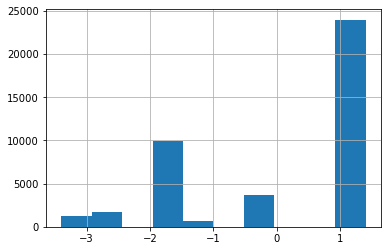

In [105]:
data_cleaned['emp.var.rate'].hist()

## Consumer Price Index

<AxesSubplot:>

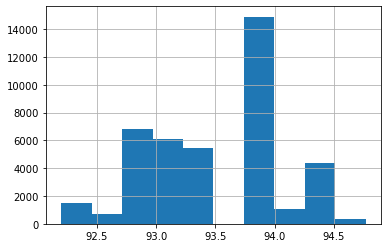

In [106]:
data_cleaned['cons.price.idx'].hist()

## Consumer Confidence Index

<AxesSubplot:>

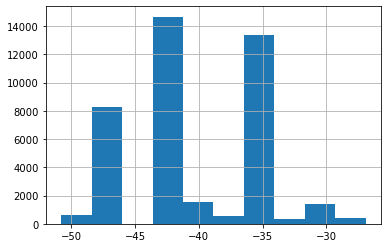

In [107]:
data_cleaned['cons.conf.idx'].hist()

## Euribor 3M- 3 month interest rate

<AxesSubplot:>

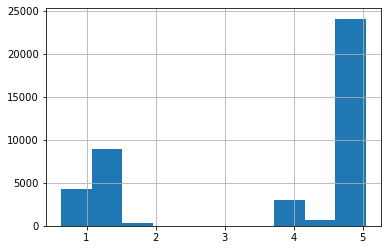

In [108]:
data_cleaned['euribor3m'].hist()

## Number of employees

<AxesSubplot:>

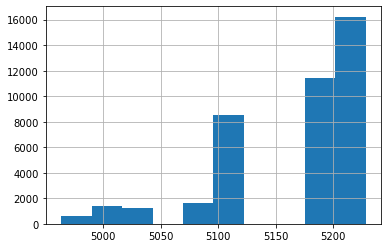

In [109]:
data_cleaned['nr.employed'].hist()

# Univariate Analysis

## Numerical Variables

## Age

In [110]:
data_cleaned['age'].quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9,1])

0.1    28.0
0.2    31.0
0.3    33.0
0.4    35.0
0.5    38.0
0.6    41.0
0.7    45.0
0.8    49.0
0.9    55.0
1.0    98.0
Name: age, dtype: float64

### Based on the percentile distribution, we create age buckets

In [111]:
data_cleaned['age_buckets']=np.where(data_cleaned['age']<=28,'<=28',
                            np.where((data_cleaned['age']>28) & (data_cleaned['age']<=45),'>=29 and <=45',
                            np.where((data_cleaned['age']>45) & (data_cleaned['age']<=55),'>=46 and <=55','>56')))

In [112]:
data_cleaned.groupby(['age_buckets']).size().reset_index()

,age_buckets,0
0,<=28,4214
1,>56,3581
2,>=29 and <=45,25134
3,>=46 and <=55,8247


## Distribution of various Age Groups

<AxesSubplot:ylabel='0'>

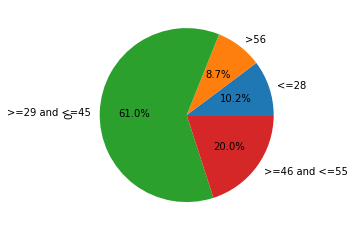

In [113]:
a=data_cleaned.groupby(['age_buckets']).size().reset_index()
a=a.set_index('age_buckets')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### 61% of the users are between 29 and 45 years

## Duration of call

In [114]:
data_cleaned['duration'].quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9,1])

0.1      59.0
0.2      89.0
0.3     116.0
0.4     146.0
0.5     180.0
0.6     222.0
0.7     280.0
0.8     368.0
0.9     551.0
1.0    4918.0
Name: duration, dtype: float64

### Based on the duration of call, we create buckets

In [115]:
data_cleaned['time_buckets']=np.where(data_cleaned['duration']<=120,'<=2 minutes',
                            np.where((data_cleaned['duration']>120) & (data_cleaned['duration']<=300),'2-5 mins',
                            '>5 mins'))

In [116]:
data_cleaned['time_buckets'].value_counts().reset_index()

,index,time_buckets
0,2-5 mins,17062
1,<=2 minutes,12912
2,>5 mins,11202


<AxesSubplot:ylabel='0'>

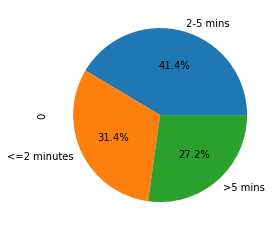

In [117]:
a=data_cleaned.groupby(['time_buckets']).size().reset_index()
a=a.set_index('time_buckets')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### 41% of the users have talked for 2-5 mins in the current campaign

## Campaign

In [118]:
data_cleaned['campaign'].quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9,1])

0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     2.0
0.6     2.0
0.7     3.0
0.8     3.0
0.9     5.0
1.0    56.0
Name: campaign, dtype: float64

## Based on the distribution, we can create buckets for the campaign variable

In [119]:
data_cleaned['camp_buckets']=np.where(data_cleaned['campaign']==1,'1 contact','more than 1 contact')

In [120]:
data_cleaned['camp_buckets'].value_counts().reset_index()

,index,camp_buckets
0,more than 1 contact,23542
1,1 contact,17634


<AxesSubplot:ylabel='0'>

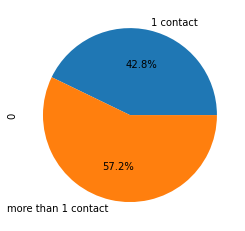

In [121]:
a=data_cleaned.groupby(['camp_buckets']).size().reset_index()
a=a.set_index('camp_buckets')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### 57.2% of the users have been contacted more than once in the current campaign

## Previous 

In [122]:
data_cleaned['previous'].quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9,1])

0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    1.0
1.0    7.0
Name: previous, dtype: float64

In [123]:
data_cleaned['previous_bucket']=np.where(data_cleaned['previous']==0,"0",
                                np.where(data_cleaned['previous']==1,"1",
                                np.where(data_cleaned['previous']==2,"2",">2")))#"<0")--0,1,2,>=2

In [124]:
data_cleaned['previous_bucket'].value_counts().reset_index()

,index,previous_bucket
0,0,35551
1,1,4561
2,2,754
3,>2,310


<AxesSubplot:ylabel='0'>

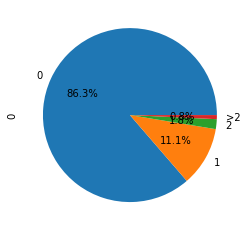

In [125]:
a=data_cleaned.groupby(['previous_bucket']).size().reset_index()
a=a.set_index('previous_bucket')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

## P-days

In [126]:
data_cleaned['pdays'].value_counts().reset_index()
data_cleaned['is_contacted']=np.where(data_cleaned['pdays']!=999,'contacted before','not contacted before')

In [127]:
data_cleaned['is_contacted'].value_counts()

not contacted before    39661
contacted before         1515
Name: is_contacted, dtype: int64

<AxesSubplot:ylabel='0'>

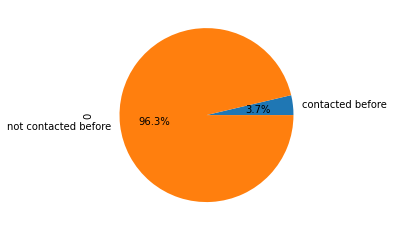

In [128]:
a=data_cleaned.groupby(['is_contacted']).size().reset_index()
a=a.set_index('is_contacted')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### 96% of our clients have not been contacted earlier

## Macro economic variables


In [129]:
data_cleaned['nr.employed_buckets'] = np.where(data_cleaned['nr.employed']<=4963.6,'4963.6', 
                                  np.where(data_cleaned['nr.employed']<=4991.6,'4991.6',
                                  np.where(data_cleaned['nr.employed']<=5008.7,'5008.7', 
                                  np.where(data_cleaned['nr.employed']<=5017.5,'5017.5', 
                                  np.where(data_cleaned['nr.employed']<=5023.5,'5023.5', 
                                 np.where(data_cleaned['nr.employed']<=5076.2,'5076.2', 
                                 np.where(data_cleaned['nr.employed']<=5099.1,'5099.1', 
                                 np.where(data_cleaned['nr.employed']<=5176.3,'5176.3', 
                                np.where(data_cleaned['nr.employed']<=5191,'5191', 
                                np.where(data_cleaned['nr.employed']<=5195.8,'5195.8','5228.1'))))))))))




<AxesSubplot:ylabel='0'>

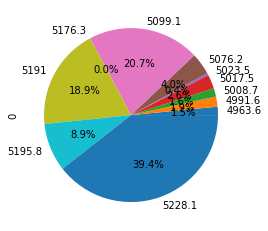

In [130]:
i=data_cleaned.groupby(['nr.employed_buckets']).size().reset_index()
i=i.set_index('nr.employed_buckets')
i.plot.pie(y=0,autopct='%1.1f%%',legend=False)

# Categorical variables

In [131]:
catdata=data_cleaned.select_dtypes(include=['object'])

In [132]:
unique_values={}
for item in catdata.columns:
    unique_values[item]=data_cleaned[item].unique()
unique_values

{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object),
 'age_buc

## Job

In [133]:
a=data_cleaned.groupby(['job']).size().reset_index()
a.set_index('job')

,0
job,
admin.,10419
blue-collar,9253
entrepreneur,1456
housemaid,1060
management,2924
retired,1718
self-employed,1421
services,3967
student,875


<AxesSubplot:ylabel='0'>

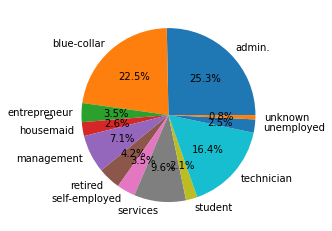

In [134]:
a=data_cleaned.groupby(['job']).size().reset_index()
a=a.set_index('job')
a.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### ~64% of the user base have Blue-collar, Admin or technicians

## Education

In [135]:
i=data_cleaned.groupby(['education']).size().reset_index()
i.set_index('education')

,0
education,
basic.4y,4176
basic.6y,2291
basic.9y,6045
high.school,9512
illiterate,18
professional.course,5240
university.degree,12164
unknown,1730


<AxesSubplot:ylabel='0'>

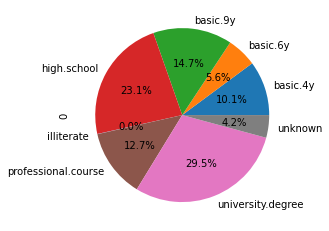

In [136]:
i=data_cleaned.groupby(['education']).size().reset_index()
i=i.set_index('education')
i.plot.pie(y=0,autopct='%1.1f%%',legend=False)

# Marital

In [137]:
data_cleaned.groupby(['marital']).size().reset_index()

,marital,0
0,divorced,4611
1,married,24921
2,single,11564
3,unknown,80


<AxesSubplot:ylabel='0'>

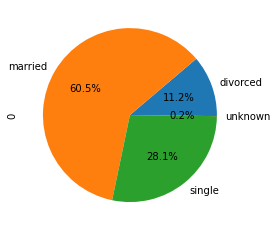

In [138]:
b=data_cleaned.groupby(['marital']).size().reset_index()
b=b.set_index('marital')
b.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### Married people form the dominant customer base in our data followed by single and divorced people

## Default

In [139]:
data_cleaned['default'].value_counts().reset_index()

,index,default
0,no,32577
1,unknown,8596
2,yes,3


<AxesSubplot:ylabel='0'>

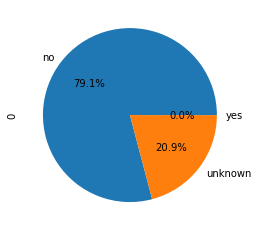

In [140]:
c=data_cleaned.groupby(['default']).size().reset_index()
c=c.set_index('default')
c.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### Majority of the user base has not defaulted prior and the remaining data is unknown

## Contact

In [141]:
data_cleaned['contact'].value_counts().reset_index()

,index,contact
0,cellular,26135
1,telephone,15041


<AxesSubplot:ylabel='0'>

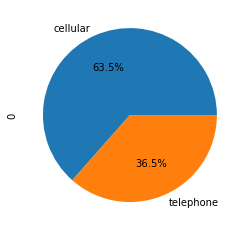

In [142]:
e=data_cleaned.groupby(['contact']).size().reset_index()
e=e.set_index('contact')
e.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### 64% of users were contacted to their cellular devices

## Month

In [143]:
data_cleaned['month'].value_counts().reset_index()

,index,month
0,may,13767
1,jul,7169
2,aug,6176
3,jun,5318
4,nov,4100
5,apr,2631
6,oct,717
7,sep,570
8,mar,546
9,dec,182


<AxesSubplot:ylabel='0'>

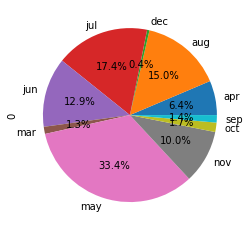

In [144]:
f=data_cleaned.groupby(['month']).size().reset_index()
f=f.set_index('month')
f.plot.pie(y=0,autopct='%1.1f%%',legend=False)

### majority(80%) of the customers were contacted in the months of may to august

## Day_of_week

In [145]:
data_cleaned['day_of_week'].value_counts().reset_index()

,index,day_of_week
0,thu,8618
1,mon,8512
2,wed,8134
3,tue,8086
4,fri,7826


<AxesSubplot:ylabel='0'>

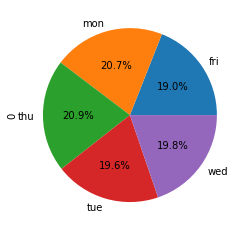

In [146]:
g=data_cleaned.groupby(['day_of_week']).size().reset_index()
g=g.set_index('day_of_week')
g.plot.pie(y=0,autopct='%1.1f%%',legend=False)

## P-outcome

In [147]:
data_cleaned['poutcome'].value_counts().reset_index()

,index,poutcome
0,nonexistent,35551
1,failure,4252
2,success,1373


<AxesSubplot:ylabel='0'>

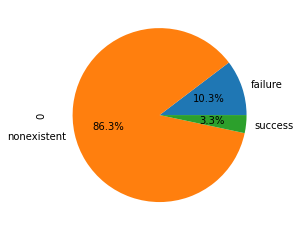

In [148]:
h=data_cleaned.groupby(['poutcome']).size().reset_index()
h=h.set_index('poutcome')
h.plot.pie(y=0,autopct='%1.1f%%',legend=False)

## Housing, Personal Loan

# Bivariate Analysis: Variable vs Outcome(y)

## Age bivariate

In [153]:
age_col=data_cleaned[['age_buckets','y']].value_counts().reset_index()
age_col=age_col.rename(columns={0:'no of customers'})
age_col

,age_buckets,y,no of customers
0,>=29 and <=45,no,22689
1,>=46 and <=55,no,7530
2,<=28,no,3478
3,>56,no,2840
4,>=29 and <=45,yes,2445
5,>56,yes,741
6,<=28,yes,736
7,>=46 and <=55,yes,717


Text(0, 0.5, '% of Customers')

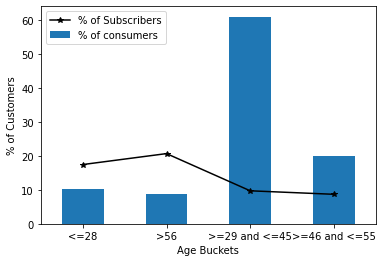

In [154]:
inter_data=data_cleaned['age_buckets'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'age_buckets':'no of consumers overall','index':'age_buckets'})
final_table=pd.merge(age_col,inter_data,how='left',on='age_buckets')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('default','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('age_buckets','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='age_buckets')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('age_buckets')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Age Buckets")
plt.ylabel("% of Customers")

### 17% of users who are less than 28 and 21% of the users who are above 56 subscribe to the term deposit -- corraborating the education field

## Duration Bivariate

In [155]:
data_cleaned[['duration','y_numeric']].corr()

,duration,y_numeric
duration,1.000000,0.405297
y_numeric,0.405297,1.000000


### There is a strong positive correlation between duration of call and the subscription

In [156]:
dur_col=data_cleaned[['time_buckets','y']].value_counts().reset_index()
dur_col=dur_col.rename(columns={0:'no of customers'})
dur_col

,time_buckets,y,no of customers
0,2-5 mins,no,15711
1,<=2 minutes,no,12746
2,>5 mins,no,8080
3,>5 mins,yes,3122
4,2-5 mins,yes,1351
5,<=2 minutes,yes,166


Text(0, 0.5, '% of Customers')

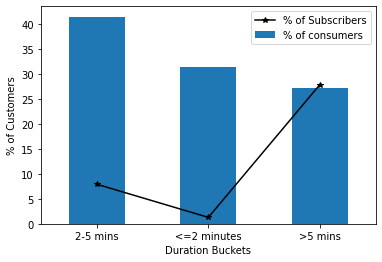

In [157]:
inter_data=data_cleaned['time_buckets'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'time_buckets':'no of consumers overall','index':'time_buckets'})
final_table=pd.merge(dur_col,inter_data,how='left',on='time_buckets')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('default','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('time_buckets','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='time_buckets')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('time_buckets')
## will change later if needed
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
plt.xlabel("Duration Buckets")
plt.ylabel("% of Customers")
#plt.legend('',frameon=False)

## Employment bivariate

In [158]:
emp_col=data_cleaned[['nr.employed_buckets','y']].value_counts().reset_index()
emp_col=emp_col.rename(columns={0:'no of customers'})
emp_col


,nr.employed_buckets,y,no of customers
0,5228.1,no,15362
1,5191,no,7522
2,5099.1,no,7440
3,5195.8,no,3450
4,5099.1,yes,1092
5,5076.2,no,1069
6,5228.1,yes,866
7,5017.5,no,616
8,5076.2,yes,593
9,5017.5,yes,454


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '4963.6'),
  Text(1, 0, '4991.6'),
  Text(2, 0, '5008.7'),
  Text(3, 0, '5017.5'),
  Text(4, 0, '5023.5'),
  Text(5, 0, '5076.2'),
  Text(6, 0, '5099.1'),
  Text(7, 0, '5176.3'),
  Text(8, 0, '5191'),
  Text(9, 0, '5195.8'),
  Text(10, 0, '5228.1')])

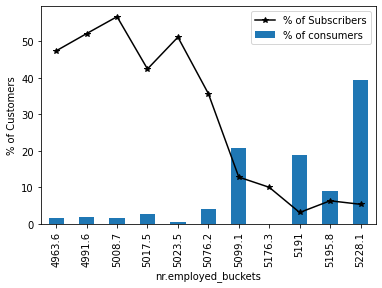

In [159]:
inter_data=data_cleaned['nr.employed_buckets'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'nr.employed_buckets':'no of consumers overall','index':'nr.employed_buckets'})
final_table=pd.merge(emp_col,inter_data,how='left',on='nr.employed_buckets')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('default','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('nr.employed_buckets','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='nr.employed_buckets')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('nr.employed_buckets')
## will change later if needed
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
plt.xlabel("nr.employed_buckets")
plt.ylabel("% of Customers")
plt.xticks(rotation=90)
#plt.legend('',frameon=False)

# Campaign Bivariate

In [160]:
data_cleaned[data_cleaned['y']=='yes'][['campaign']].value_counts().reset_index()

,campaign,0
0,1,2299
1,2,1211
2,3,574
3,4,249
4,5,120
5,6,75
6,7,38
7,9,17
8,8,17
9,10,12


### If contacted more than once in the current campaign, the users do not subscribe

In [161]:
data_cleaned['emp.var.rate_bucket']=np.where(data_cleaned['emp.var.rate']>0,">0","<0")

# Previous Bivariate

In [162]:
prev_col=data_cleaned[['previous_bucket','y']].value_counts().reset_index()
prev_col=prev_col.rename(columns={0:'no of customers'})
prev_col

,previous_bucket,y,no of customers
0,0,no,32411
1,1,no,3594
2,0,yes,3140
3,1,yes,967
4,2,no,404
5,2,yes,350
6,>2,yes,182
7,>2,no,128


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '>2')])

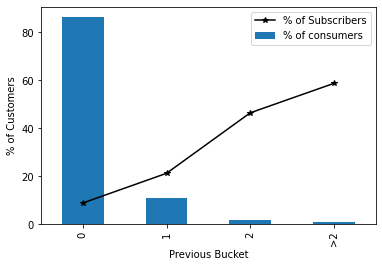

In [163]:
inter_data=data_cleaned['previous_bucket'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'previous_bucket':'no of consumers overall','index':'previous_bucket'})
final_table=pd.merge(prev_col,inter_data,how='left',on='previous_bucket')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('job','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('previous_bucket','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='previous_bucket')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('previous_bucket')
#temp_tes[['no','yes']].plot(kind='bar',label=True)
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Previous Bucket")
plt.ylabel("% of Customers")
plt.xticks(rotation=90)
#plt.legend('',frameon=False)

# Job Bivariate

In [164]:
job_col=data_cleaned[['job','y']].value_counts().reset_index()
job_col=job_col.rename(columns={0:'no of customers'})
job_col

,job,y,no of customers
0,admin.,no,9068
1,blue-collar,no,8615
2,technician,no,6009
3,services,no,3644
4,management,no,2596
5,admin.,yes,1351
6,entrepreneur,no,1332
7,retired,no,1284
8,self-employed,no,1272
9,housemaid,no,954


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

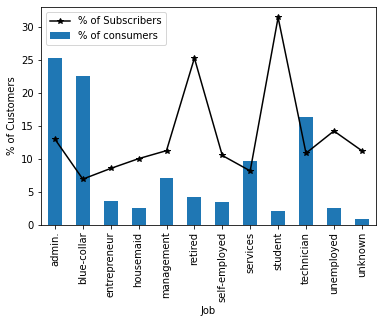

In [165]:
inter_data=data_cleaned['job'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'job':'no of consumers overall','index':'job'})
final_table=pd.merge(job_col,inter_data,how='left',on='job')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('job','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('job','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='job')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('job')
#temp_tes[['no','yes']].plot(kind='bar',label=True)
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Job")
plt.ylabel("% of Customers")
plt.xticks(rotation=90)
#plt.legend('',frameon=False)

### 31% of retired people and 25 % of students opt for term deposits when compared to people from other job categories even though retired people and students is only 6% of our user base. This may happen because these people do not have a stable income and may have to settle with low risk term deposits when compared to people with other professions who have disposable income and might wish to invest their money in other high risk options

# Education Bivariate

In [166]:
edu_col=data_cleaned[['education','y']].value_counts().reset_index()
edu_col=edu_col.rename(columns={0:'no of customers'})
edu_col

,education,y,no of customers
0,university.degree,no,10495
1,high.school,no,8481
2,basic.9y,no,5572
3,professional.course,no,4645
4,basic.4y,no,3748
5,basic.6y,no,2103
6,university.degree,yes,1669
7,unknown,no,1479
8,high.school,yes,1031
9,professional.course,yes,595


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

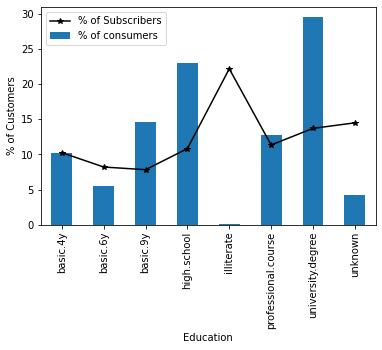

In [167]:
inter_data=data_cleaned['education'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'education':'no of consumers overall','index':'education'})
final_table=pd.merge(edu_col,inter_data,how='left',on='education')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('education','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('education','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='education')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('education')
#temp_tes[['no','yes']].plot(kind='bar',label=True)
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Education")
plt.ylabel("% of Customers")
plt.xticks(rotation=90)
#plt.legend('',frameon=False)

# Marital Status Bivariate

In [168]:
mar_col=data_cleaned[['marital','y']].value_counts().reset_index()
mar_col=mar_col.rename(columns={0:'no of customers'})
mar_col

,marital,y,no of customers
0,married,no,22390
1,single,no,9944
2,divorced,no,4135
3,married,yes,2531
4,single,yes,1620
5,divorced,yes,476
6,unknown,no,68
7,unknown,yes,12


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced'),
  Text(1, 0, 'married'),
  Text(2, 0, 'single'),
  Text(3, 0, 'unknown')])

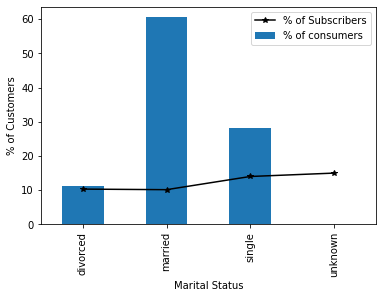

In [169]:
inter_data=data_cleaned['marital'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'marital':'no of consumers overall','index':'marital'})
final_table=pd.merge(mar_col,inter_data,how='left',on='marital')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('marital','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('marital','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='marital')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('marital')
#temp_tes[['no','yes']].plot(kind='bar',label=True)
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Marital Status")
plt.ylabel("% of Customers")
plt.xticks(rotation=90)
#plt.legend('',frameon=False)

### Marital status doesnt seem to affect the decision of the person to take a term deposit or not as all categories fall in the 10-15% range 

# Default Bivariate

In [170]:
def_col=data_cleaned[['default','y']].value_counts().reset_index()
def_col=def_col.rename(columns={0:'no of customers'})
def_col

,default,y,no of customers
0,no,no,28381
1,unknown,no,8153
2,no,yes,4196
3,unknown,yes,443
4,yes,no,3


Text(0, 0.5, '% of Customers')

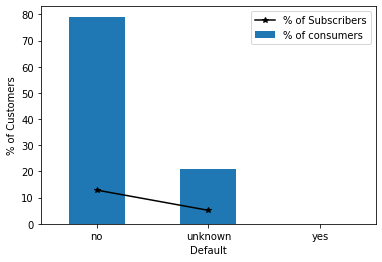

In [171]:
inter_data=data_cleaned['default'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'default':'no of consumers overall','index':'default'})
final_table=pd.merge(def_col,inter_data,how='left',on='default')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('default','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('default','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='default')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('default')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Default")
plt.ylabel("% of Customers")
#plt.legend('',frameon=False)

# Personal Loan Bivariate

In [172]:
hom_col=data_cleaned[['loan','y']].value_counts().reset_index()
hom_col=hom_col.rename(columns={0:'no of customers'})
hom_col

,loan,y,no of customers
0,no,no,30089
1,yes,no,5565
2,no,yes,3849
3,unknown,no,883
4,yes,yes,683
5,unknown,yes,107


Text(0, 0.5, '% of Customers')

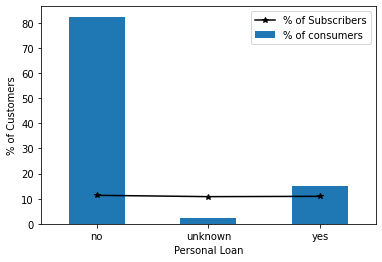

In [173]:
inter_data=data_cleaned['loan'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'loan':'no of consumers overall','index':'loan'})
final_table=pd.merge(hom_col,inter_data,how='left',on='loan')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('loan','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('loan','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='loan')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('loan')
#temp_tes[['no','yes']].plot(kind='bar',label=True)
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
#plt.legend('',frameon=False)
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Personal Loan")
plt.ylabel("% of Customers")

# Contact Bivariate

In [174]:
cel_col=data_cleaned[['contact','y']].value_counts().reset_index()
cel_col=cel_col.rename(columns={0:'no of customers'})
cel_col

,contact,y,no of customers
0,cellular,no,22283
1,telephone,no,14254
2,cellular,yes,3852
3,telephone,yes,787


Text(0, 0.5, '% of Customers')

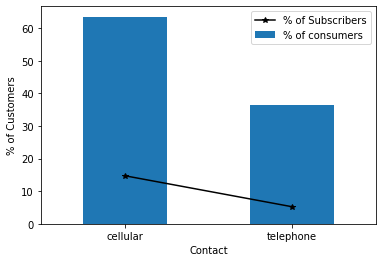

In [175]:
inter_data=data_cleaned['contact'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'contact':'no of consumers overall','index':'contact'})
final_table=pd.merge(cel_col,inter_data,how='left',on='contact')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('contact','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('contact','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='contact')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('contact')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
#plt.legend('',frameon=False)
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Contact")
plt.ylabel("% of Customers")

### Users contacted on their cellular device have a 20% chance of having a term deposit which is high when compared to those who were contacted through telephones

# Month Bivariate

In [176]:
mon_col=data_cleaned[['month','y']].value_counts().reset_index()
mon_col=mon_col.rename(columns={0:'no of customers'})
mon_col

,month,y,no of customers
0,may,no,12881
1,jul,no,6521
2,aug,no,5521
3,jun,no,4759
4,nov,no,3684
5,apr,no,2092
6,may,yes,886
7,aug,yes,655
8,jul,yes,648
9,jun,yes,559


Text(0, 0.5, '% of Customers')

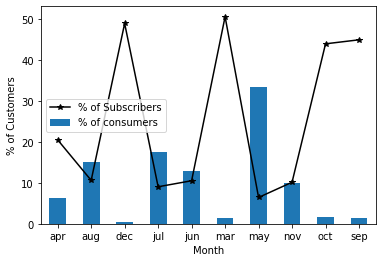

In [177]:
inter_data=data_cleaned['month'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'month':'no of consumers overall','index':'month'})
final_table=pd.merge(mon_col,inter_data,how='left',on='month')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('month','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('month','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='month')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('month')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
#plt.legend('',frameon=False)
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Month")
plt.ylabel("% of Customers")

### Although the no of customers contacted in december and march are less, they seem to have the highest propensity to purchase a term deposit when compared to customers who were contacted in other months

# Day of week Bivariate

In [178]:
day_col=data_cleaned[['day_of_week','y']].value_counts().reset_index()
day_col=day_col.rename(columns={0:'no of customers'})
day_col

,day_of_week,y,no of customers
0,mon,no,7665
1,thu,no,7574
2,wed,no,7185
3,tue,no,7133
4,fri,no,6980
5,thu,yes,1044
6,tue,yes,953
7,wed,yes,949
8,mon,yes,847
9,fri,yes,846


Text(0, 0.5, '% of Customers')

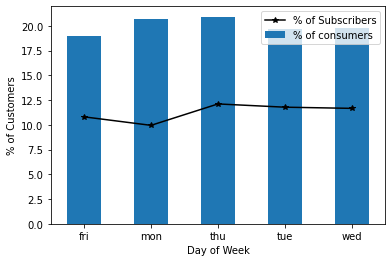

In [179]:
inter_data=data_cleaned['day_of_week'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'day_of_week':'no of consumers overall','index':'day_of_week'})
final_table=pd.merge(day_col,inter_data,how='left',on='day_of_week')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
#final_table.pivot('day_of_week','y','% of customers').plot(kind='bar',label=True)

test=final_table.pivot('day_of_week','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='day_of_week')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('day_of_week')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=False,marker='*', color='black')
#plt.legend('',frameon=False)
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Day of Week")
plt.ylabel("% of Customers")

### Day of week doesnt seem to affect a customer's decision to subscribe to term deposit

# Poutcome bivariate

In [180]:
pout_col=data_cleaned[['poutcome','y']].value_counts().reset_index()
pout_col=pout_col.rename(columns={0:'no of customers'})
pout_col

,poutcome,y,no of customers
0,nonexistent,no,32411
1,failure,no,3647
2,nonexistent,yes,3140
3,success,yes,894
4,failure,yes,605
5,success,no,479


Text(0, 0.5, '% of Customers')

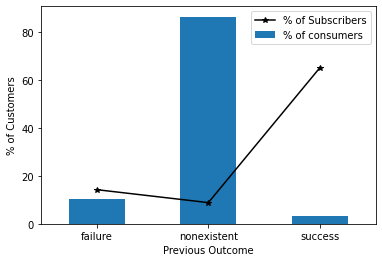

In [181]:
inter_data=data_cleaned['poutcome'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'poutcome':'no of consumers overall','index':'poutcome'})
final_table=pd.merge(pout_col,inter_data,how='left',on='poutcome')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(data_cleaned))*100

test=final_table.pivot('poutcome','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='poutcome')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(data_cleaned))*100
temp_tes=temp_tes.set_index('poutcome')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Previous Outcome")
plt.ylabel("% of Customers")

### There is a 65% chance that the user subscribes to the term deposit if the previous campaign was a success although there is only 3% of users who previously subscribed

# P-days bivariate

In [182]:
data_cleaned[data_cleaned['y']=='yes']['pdays'].value_counts().reset_index()

,index,pdays
0,999,3672
1,3,298
2,6,289
3,4,63
4,7,40
5,2,37
6,9,35
7,10,30
8,5,29
9,13,28


### Out of the 96%, only 10% of them subscribed for term deposit while 64% of those who were contacted earlier have subscribed for term deposit indicating that those who are contacted more than once have a higher chance of subsribing

# Deep dives-Profiling the Customer

#### 1. Who you should call?
#### 2. When you should call?
#### 3. How you should call?
#### 4. How long you should have them on the line 

## Student

In [183]:
#Who should you call?
student_data=data_cleaned[(data_cleaned['job']=='student')]

In [184]:
# When should you call?
month_col=student_data[['month','y']].value_counts().reset_index()
month_col=month_col.rename(columns={0:'no of customers'})

inter_data=student_data['month'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'month':'no of consumers overall','index':'month'})
final_table=pd.merge(month_col,inter_data,how='left',on='month')

final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(student_data))*100

In [185]:
final_table

,month,y,no of customers,no of consumers overall,% of customers,% of overall consumers
0,may,no,189,232,81.465517,26.514286
1,jul,no,83,105,79.047619,12.000000
2,aug,no,72,116,62.068966,13.257143
3,apr,no,69,104,66.346154,11.885714
4,jun,no,68,101,67.326733,11.542857
5,aug,yes,44,116,37.931034,13.257143
6,may,yes,43,232,18.534483,26.514286
7,nov,no,36,54,66.666667,6.171429
8,apr,yes,35,104,33.653846,11.885714
9,jun,yes,33,101,32.673267,11.542857


Text(0, 0.5, '% of Customers')

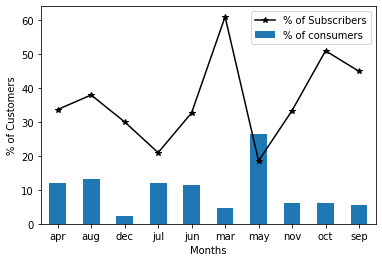

In [186]:
inter_data=student_data['month'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'month':'no of consumers overall','index':'month'})
final_table=pd.merge(month_col,inter_data,how='left',on='month')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(student_data))*100

test=final_table.pivot('month','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='month')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(student_data))*100
temp_tes=temp_tes.set_index('month')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Months")
plt.ylabel("% of Customers")

In [187]:
temp_tes

,no,yes,no of consumers overall,% of overall
month,,,,
apr,66.346154,33.653846,104,11.885714
aug,62.068966,37.931034,116,13.257143
dec,70.000000,30.000000,20,2.285714
jul,79.047619,20.952381,105,12.000000
jun,67.326733,32.673267,101,11.542857
mar,39.024390,60.975610,41,4.685714
may,81.465517,18.534483,232,26.514286
nov,66.666667,33.333333,54,6.171429
oct,49.056604,50.943396,53,6.057143


In [188]:
# filtering for months of mar, dec
month_filter=student_data[(student_data['month']!='jul') | (student_data['month']!='may')]

In [189]:
# How should you call?
con_col=month_filter[['contact','y']].value_counts().reset_index()
con_col=con_col.rename(columns={0:'no of customers'})

Text(0, 0.5, '% of Customers')

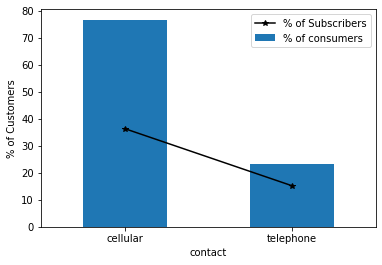

In [190]:

inter_data=month_filter['contact'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'contact':'no of consumers overall','index':'contact'})
final_table=pd.merge(con_col,inter_data,how='left',on='contact')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(month_filter))*100

test=final_table.pivot('contact','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='contact')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(month_filter))*100
temp_tes=temp_tes.set_index('contact')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("contact")
plt.ylabel("% of Customers")

In [191]:
temp_tes

,no,yes,no of consumers overall,% of overall
contact,,,,
cellular,63.636364,36.363636,671,76.685714
telephone,84.803922,15.196078,204,23.314286


In [192]:
# filtering for cellular
cell_filter=month_filter[month_filter['contact']=='cellular']

Text(0, 0.5, '% of Customers')

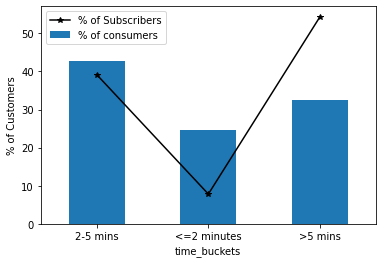

In [193]:
# How long should you have them in the call?
dur_col=cell_filter[['time_buckets','y']].value_counts().reset_index()
dur_col=dur_col.rename(columns={0:'no of customers'})

inter_data=cell_filter['time_buckets'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'time_buckets':'no of consumers overall','index':'time_buckets'})
final_table=pd.merge(dur_col,inter_data,how='left',on='time_buckets')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(cell_filter))*100

test=final_table.pivot('time_buckets','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='time_buckets')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(cell_filter))*100
temp_tes=temp_tes.set_index('time_buckets')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("time_buckets")
plt.ylabel("% of Customers")

In [194]:
temp_tes

,no,yes,no of consumers overall,% of overall
time_buckets,,,,
2-5 mins,60.839161,39.160839,286,42.622951
<=2 minutes,92.168675,7.831325,166,24.739195
>5 mins,45.662100,54.337900,219,32.637854


In [195]:
# filtering for time duration more than 2 minutes
time_filter=cell_filter[cell_filter['time_buckets']!='<=2 minutes']

Text(0, 0.5, '% of Customers')

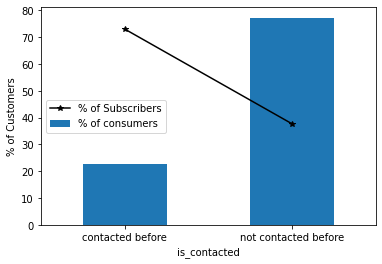

In [196]:
# Should you call those who were contacted Previously?
prev_col=time_filter[['is_contacted','y']].value_counts().reset_index()
prev_col=prev_col.rename(columns={0:'no of customers'})

inter_data=time_filter['is_contacted'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'is_contacted':'no of consumers overall','index':'is_contacted'})
final_table=pd.merge(prev_col,inter_data,how='left',on='is_contacted')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(time_filter))*100

test=final_table.pivot('is_contacted','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='is_contacted')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(time_filter))*100
temp_tes=temp_tes.set_index('is_contacted')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("is_contacted")
plt.ylabel("% of Customers")

In [197]:
temp_tes

,no,yes,no of consumers overall,% of overall
is_contacted,,,,
contacted before,26.956522,73.043478,115,22.772277
not contacted before,62.307692,37.692308,390,77.227723


In [198]:
student_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,y_numeric,age_buckets,time_buckets,camp_buckets,previous_bucket,is_contacted,nr.employed_buckets,emp.var.rate_bucket
205,35,student,single,university.degree,unknown,no,no,telephone,may,mon,...,5191.0,no,0,>=29 and <=45,2-5 mins,1 contact,0,not contacted before,5191,>0
206,35,student,single,university.degree,unknown,yes,yes,telephone,may,mon,...,5191.0,no,0,>=29 and <=45,2-5 mins,1 contact,0,not contacted before,5191,>0
209,35,student,single,university.degree,unknown,yes,no,telephone,may,mon,...,5191.0,no,0,>=29 and <=45,2-5 mins,1 contact,0,not contacted before,5191,>0
210,36,student,single,basic.9y,no,yes,no,telephone,may,mon,...,5191.0,no,0,>=29 and <=45,2-5 mins,1 contact,0,not contacted before,5191,>0
267,31,student,single,university.degree,unknown,no,no,telephone,may,mon,...,5191.0,no,0,>=29 and <=45,>5 mins,more than 1 contact,0,not contacted before,5191,>0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,19,student,single,basic.9y,no,yes,no,cellular,nov,wed,...,4963.6,no,0,<=28,2-5 mins,1 contact,1,not contacted before,4963.6,<0
41098,29,student,single,high.school,no,yes,yes,cellular,nov,thu,...,4963.6,yes,1,>=29 and <=45,2-5 mins,1 contact,>2,contacted before,4963.6,<0
41134,25,student,single,high.school,no,no,no,cellular,nov,thu,...,4963.6,yes,1,<=28,2-5 mins,1 contact,0,not contacted before,4963.6,<0
41171,33,student,married,professional.course,no,yes,no,telephone,nov,thu,...,4963.6,yes,1,>=29 and <=45,<=2 minutes,1 contact,0,not contacted before,4963.6,<0


## Retired


In [199]:
#Who should you call?
retired_data=data_cleaned[(data_cleaned['job']=='retired')]

In [200]:
# When should you call?
month_col=retired_data[['month','y']].value_counts().reset_index()
month_col=month_col.rename(columns={0:'no of customers'})

inter_data=retired_data['month'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'month':'no of consumers overall','index':'month'})
final_table=pd.merge(month_col,inter_data,how='left',on='month')

final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(retired_data))*100

Text(0, 0.5, '% of Customers')

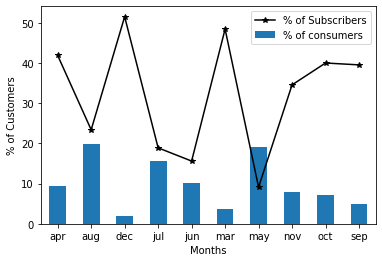

In [201]:
inter_data=retired_data['month'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'month':'no of consumers overall','index':'month'})
final_table=pd.merge(month_col,inter_data,how='left',on='month')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(retired_data))*100

test=final_table.pivot('month','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='month')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(retired_data))*100
temp_tes=temp_tes.set_index('month')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("Months")
plt.ylabel("% of Customers")

In [202]:
temp_tes

,no,yes,no of consumers overall,% of overall
month,,,,
apr,58.125000,41.875000,160,9.313155
aug,76.608187,23.391813,342,19.906868
dec,48.484848,51.515152,33,1.920838
jul,81.111111,18.888889,270,15.715949
jun,84.393064,15.606936,173,10.069849
mar,51.562500,48.437500,64,3.725262
may,90.881459,9.118541,329,19.150175
nov,65.441176,34.558824,136,7.916182
oct,60.000000,40.000000,125,7.275902


In [203]:
# filtering for months of mar, dec
month_filter=retired_data[(retired_data['month']=='mar') | (retired_data['month']=='sep') | (retired_data['month']=='oct') |
                          (retired_data['month']=='nov') | (retired_data['month']=='dec') | (retired_data['month']=='apr')]

In [204]:
# How should you call?
con_col=month_filter[['contact','y']].value_counts().reset_index()
con_col=con_col.rename(columns={0:'no of customers'})

Text(0, 0.5, '% of Customers')

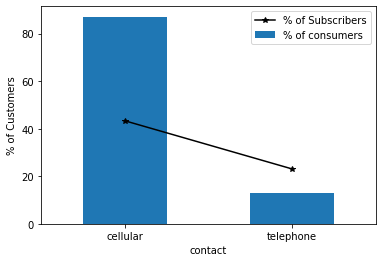

In [205]:

inter_data=month_filter['contact'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'contact':'no of consumers overall','index':'contact'})
final_table=pd.merge(con_col,inter_data,how='left',on='contact')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(month_filter))*100

test=final_table.pivot('contact','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='contact')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(month_filter))*100
temp_tes=temp_tes.set_index('contact')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("contact")
plt.ylabel("% of Customers")

In [206]:
temp_tes

,no,yes,no of consumers overall,% of overall
contact,,,,
cellular,56.653992,43.346008,526,87.086093
telephone,76.923077,23.076923,78,12.913907


In [207]:
# filtering for cellular
cell_filter=month_filter[month_filter['contact']=='cellular']

Text(0, 0.5, '% of Customers')

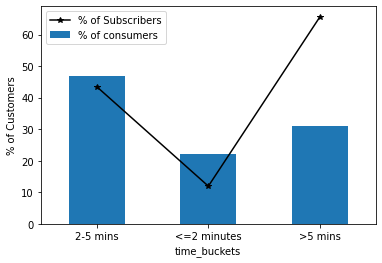

In [208]:
# How long should you have them in the call?
dur_col=cell_filter[['time_buckets','y']].value_counts().reset_index()
dur_col=dur_col.rename(columns={0:'no of customers'})

inter_data=cell_filter['time_buckets'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'time_buckets':'no of consumers overall','index':'time_buckets'})
final_table=pd.merge(dur_col,inter_data,how='left',on='time_buckets')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(cell_filter))*100

test=final_table.pivot('time_buckets','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='time_buckets')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(cell_filter))*100
temp_tes=temp_tes.set_index('time_buckets')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("time_buckets")
plt.ylabel("% of Customers")

In [209]:
temp_tes

,no,yes,no of consumers overall,% of overall
time_buckets,,,,
2-5 mins,56.504065,43.495935,246,46.768061
<=2 minutes,88.034188,11.965812,117,22.243346
>5 mins,34.355828,65.644172,163,30.988593


In [210]:
# filtering for time duration more than 2 minutes
time_filter=cell_filter[cell_filter['time_buckets']!='<=2 minutes']

Text(0, 0.5, '% of Customers')

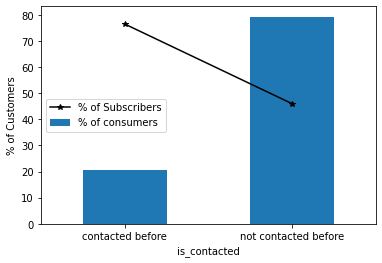

In [211]:
# Should you call those who were contacted Previously?
prev_col=time_filter[['is_contacted','y']].value_counts().reset_index()
prev_col=prev_col.rename(columns={0:'no of customers'})

inter_data=time_filter['is_contacted'].value_counts().reset_index()
inter_data=inter_data.rename(columns={'is_contacted':'no of consumers overall','index':'is_contacted'})
final_table=pd.merge(prev_col,inter_data,how='left',on='is_contacted')
final_table['% of customers']=(final_table['no of customers']/final_table['no of consumers overall'])*100
final_table['% of overall consumers']=(final_table['no of consumers overall']/len(time_filter))*100

test=final_table.pivot('is_contacted','y','% of customers')
temp_tes=pd.merge(test,inter_data,how='left',on='is_contacted')
temp_tes['% of overall']=(temp_tes['no of consumers overall']/len(time_filter))*100
temp_tes=temp_tes.set_index('is_contacted')
#temp_tes[['no','yes']].plot(kind='bar')
#temp_tes['% of overall'].plot(kind='line',secondary_y=True,marker='*', color='black')
temp_tes['% of overall'].plot(kind='bar',label=True)
temp_tes['yes'].plot(kind='line',secondary_y=False,marker='*', color='black')
plt.legend(['% of Subscribers','% of consumers'])
#plt.title("")
plt.xlabel("is_contacted")
plt.ylabel("% of Customers")

In [212]:
temp_tes

,no,yes,no of consumers overall,% of overall
is_contacted,,,,
contacted before,23.529412,76.470588,85,20.782396
not contacted before,54.012346,45.987654,324,79.217604


## Untapped market

In [213]:
## Segment users based on Age, Job, Marital Status

In [216]:
aggdata=data_cleaned.groupby(['age_buckets','marital','job']).size().reset_index()

aggdata.to_excel(path + 'sample_data1.xlsx',sheet_name='sheet1')

In [217]:
aggdata=data_cleaned[data_cleaned['y']=='yes'].groupby(['age_buckets','marital','job']).size().reset_index()

aggdata.to_excel(path + 'sample_data2.xlsx',sheet_name='sheet1')

### Model Building

In [224]:
dataset=pd.read_csv(path + 'bank-additional-full.csv',sep=';')
dataset['job']= dataset['job'].apply(lambda x: x.replace('unknown','unknown_job'))
dataset['marital']= dataset['marital'].apply(lambda x: x.replace('unknown','unknown_marital'))
dataset['education']= dataset['education'].apply(lambda x: x.replace('unknown','unknown_education'))
dataset['default']= dataset['default'].apply(lambda x: x.replace('unknown','unknown_default')).apply(lambda x: x.replace('no','no_default')).apply(lambda x: x.replace('yes','yes_default'))
dataset['housing']= dataset['housing'].apply(lambda x: x.replace('unknown','unknown_housing')).apply(lambda x: x.replace('no','no_housing')).apply(lambda x: x.replace('yes','yes_housing'))
dataset['loan']= dataset['loan'].apply(lambda x: x.replace('unknown','unknown_loan')).apply(lambda x: x.replace('no','no_loan')).apply(lambda x: x.replace('yes','yes_loan'))

In [225]:
catdata=dataset.select_dtypes(include=['object'])
cat=list(catdata.columns)
cat.remove('y')
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

### One Hot encoding 

In [226]:
# Get one hot encoding of categorical columns 
# Drop column as it is now encoded
# Join the encoded df
for i in cat:
    one_hot = pd.get_dummies(dataset[i])
    dataset = dataset.drop(i,axis = 1)
    dataset = dataset.join(one_hot)

### Label Encoding of target variable

In [227]:
#Label encoding the target column 'y'
dataset['y_numeric']=np.where(dataset['y']=='yes',1,0)
dataset = dataset.drop('y',axis = 1)

In [228]:
dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y_numeric
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


### Split into train and test dataset

In [229]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### LGBM on test data

In [230]:
classifier = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)

classifier.fit(X_train,y_train)

LGBMClassifier(metric='None', n_estimators=5000, n_jobs=4, random_state=314,
               silent=True)

In [231]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10501   468]
 [  659   729]]


0.9087966334870924

In [232]:
xg_probs = classifier.predict_proba(X_test)
xg_probs_final=xg_probs[:,1]
xg_probs_final.shape

(12357,)

In [233]:
roc_auc_score(y_test, xg_probs_final)

0.9393189688624713

### SMOTE as the data is imbalanced

In [234]:
sm=SMOTE()

X_os,y_os=sm.fit_resample(X_train,y_train)

In [235]:
Xm=X_os.values
ym=y_os.values

### LGBM after SMOTE

In [236]:
classifier = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
classifier.fit(Xm,ym)

LGBMClassifier(metric='None', n_estimators=5000, n_jobs=4, random_state=314,
               silent=True)

In [237]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10507   462]
 [  645   743]]


0.9104151493080845

In [238]:
xg_probs = classifier.predict_proba(X_test)
xg_probs_final=xg_probs[:,1]
xg_probs_final.shape

(12357,)

In [239]:
roc_auc_score(y_test, xg_probs_final)

0.9414920434664839

### ANOVA and Chi Sq to detect siginificant variables

#### ANOVA- Dependent: Categorical  Independent: Continuous
#### Chi Sq- Dependent: Categorical Independent: Categorical

In [282]:
data1= pd.read_csv(path + 'bank-additional-full.csv',sep=';')

In [283]:
data2 = data1.copy()

In [284]:
data2.columns = data2.columns.str.replace('.', '')

In [285]:
numdata=data2.select_dtypes(exclude=['object'])
num=numdata.columns
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'empvarrate',
       'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed'],
      dtype='object')

In [286]:
for i in num:
    print('*'*10,i,'*'*10)
    s= str(i) +'~y'
    print(s)
    model = ols(s, data=data2).fit()
    anova=sm.stats.anova_lm(model, typ=2)
    print(anova,'\n')

********** age **********
age~y
                sum_sq       df          F        PR(>F)
y         4.133451e+03      1.0  38.094659  6.802136e-10
Residual  4.468876e+06  41186.0        NaN           NaN 

********** duration **********
duration~y
                sum_sq       df            F  PR(>F)
y         4.547710e+08      1.0  8094.101634     0.0
Residual  2.314055e+09  41186.0          NaN     NaN 

********** campaign **********
campaign~y
                 sum_sq       df           F        PR(>F)
y           1391.562959      1.0  182.156673  2.007780e-41
Residual  314635.259513  41186.0         NaN           NaN 

********** pdays **********
pdays~y
                sum_sq       df            F  PR(>F)
y         1.519034e+08      1.0  4861.173272     0.0
Residual  1.286993e+09  41186.0          NaN     NaN 

********** previous **********
previous~y
               sum_sq       df            F  PR(>F)
y          534.485490      1.0  2304.257088     0.0
Residual  9553.326106  41186

In [287]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [288]:
for i in cat:
    ct_table_ind=pd.crosstab(data1["y"],data1[i])
    print('*'*10,i,'*'*10)
    print('contingency_table :\n',ct_table_ind)
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
    print(f"chi2 statistic:     {chi2_stat:.5g}")
    print(f"p-value:            {p:.5g}",'\n\n')
    # print(f"degrees of freedom: {dof}")
    # print("expected frequencies:\n",expected)

********** job **********
contingency_table :
 job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  
chi2 statistic:     961.24
p-value:            4.1898e-199 


********** marital **********
contingency_table :
 marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12
chi2 statistic:     122.66
p-value:            2.068e-26 


********** educ

### LGBM with only significant variables

In [292]:
data2 = data1.drop('loan',axis = 1).drop('housing',axis = 1)
data2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [293]:
data2.head()
data2['job']= data2['job'].apply(lambda x: x.replace('unknown','unknown_job'))
data2['marital']= data2['marital'].apply(lambda x: x.replace('unknown','unknown_marital'))
data2['education']= data2['education'].apply(lambda x: x.replace('unknown','unknown_education'))
data2['default']= data2['default'].apply(lambda x: x.replace('unknown','unknown_default')).apply(lambda x: x.replace('no','no_default')).apply(lambda x: x.replace('yes','yes_default'))

In [294]:
catdata2=data2.select_dtypes(include=['object'])
cat2=list(catdata2.columns)
cat2.remove('y')
cat2

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [295]:
# Get one hot encoding of categorical columns 
# Drop column as it is now encoded
# Join the encoded df
for i in cat2:
    one_hot = pd.get_dummies(data2[i])
    data2 = data2.drop(i,axis = 1)
    data2 = data2.join(one_hot)

In [296]:
#Label encoding the target column 'y'
data2['y_numeric']=np.where(data2['y']=='yes',1,0)
data2 = data2.drop('y',axis = 1)

### Split into train and test dataset

In [297]:
data2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y_numeric
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


In [298]:
X=data2.iloc[:,:-1]
y=data2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [299]:
sm=SMOTE()
X_os,y_os=sm.fit_resample(X_train,y_train)

In [300]:
Xm=X_os.values
ym=y_os.values

In [301]:
classifier = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)

classifier.fit(Xm,ym)

LGBMClassifier(metric='None', n_estimators=5000, n_jobs=4, random_state=314,
               silent=True)

In [302]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10491   478]
 [  640   748]]


0.9095249656065388

In [303]:
xg_probs = classifier.predict_proba(X_test)
xg_probs_final=xg_probs[:,1]
xg_probs_final.shape

(12357,)

In [304]:
roc_auc_score(y_test, xg_probs_final)

0.9412699084109974

### Clustering

In [594]:
data = pd.read_csv(path + 'bank-additional-full.csv',sep=';')

In [595]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [596]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [597]:
#selecting variables to run kmode clustering on : we use k mode since the data is categorical
data = data[['age', 'job', 'marital', 'education', 'housing', 'loan']]

In [598]:
data.head()

,age,job,marital,education,housing,loan
0,56,housemaid,married,basic.4y,no,no
1,57,services,married,high.school,no,no
2,37,services,married,high.school,yes,no
3,40,admin.,married,basic.6y,no,no
4,56,services,married,high.school,no,yes


In [599]:
data['age_bin'] = pd.cut(data['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [600]:
data  = data.drop('age',axis = 1)

In [601]:
labelencoder_job = preprocessing.LabelEncoder()
labelencoder_marital = preprocessing.LabelEncoder()
labelencoder_education = preprocessing.LabelEncoder()
labelencoder_housing = preprocessing.LabelEncoder()
labelencoder_loan = preprocessing.LabelEncoder()
labelencoder_age_bin = preprocessing.LabelEncoder()

In [602]:
data['job'] = labelencoder_job.fit_transform(data['job'].astype(str))
data['marital'] = labelencoder_marital.fit_transform(data['marital'].astype(str))
data['education'] = labelencoder_education.fit_transform(data['education'].astype(str))
data['housing'] = labelencoder_housing.fit_transform(data['housing'].astype(str))
data['loan'] = labelencoder_loan.fit_transform(data['loan'].astype(str))
data['age_bin'] = labelencoder_age_bin.fit_transform(data['age_bin'].astype(str))

In [603]:
mapping = dict(zip(labelencoder_job.classes_, range(1, len(labelencoder_job.classes_)+1)))
print(mapping)

{'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown': 12}


In [604]:
mapping = dict(zip(labelencoder_marital.classes_, range(1, len(labelencoder_marital.classes_)+1)))
print(mapping)

{'divorced': 1, 'married': 2, 'single': 3, 'unknown': 4}


In [605]:
mapping = dict(zip(labelencoder_education.classes_, range(1, len(labelencoder_education.classes_)+1)))
print(mapping)

{'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': 5, 'professional.course': 6, 'university.degree': 7, 'unknown': 8}


In [606]:
mapping = dict(zip(labelencoder_housing.classes_, range(1, len(labelencoder_housing.classes_)+1)))
print(mapping)

{'no': 1, 'unknown': 2, 'yes': 3}


In [607]:
mapping = dict(zip(labelencoder_loan.classes_, range(1, len(labelencoder_loan.classes_)+1)))
print(mapping)

{'no': 1, 'unknown': 2, 'yes': 3}


In [608]:
mapping = dict(zip(labelencoder_age_bin.classes_, range(1, len(labelencoder_age_bin.classes_)+1)))
print(mapping)

{'0-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, '60-70': 6, '70-80': 7, '80-90': 8, '90-100': 9}


In [609]:
#Choosing K 
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 127699.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 110076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 103358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 99219.0


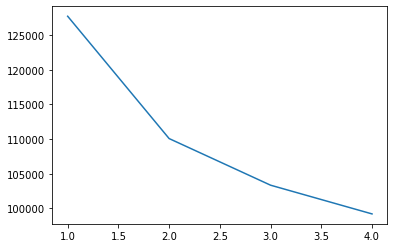

In [610]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [611]:
#Choosing K = 2

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 110076.0


In [612]:
fitClusters_cao

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [613]:
data = data.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [614]:
combinedDf.head()

,job,marital,education,housing,loan,age_bin,cluster_predicted
0,3,1,0,0,0,4,0
1,7,1,3,0,0,4,1
2,7,1,3,2,0,2,0
3,0,1,1,0,0,2,0
4,7,1,3,0,2,4,1


In [615]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [616]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [617]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10779 entries, 1 to 41186
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                10779 non-null  int32 
 1   marital            10779 non-null  int32 
 2   education          10779 non-null  int32 
 3   housing            10779 non-null  int32 
 4   loan               10779 non-null  int32 
 5   age_bin            10779 non-null  int32 
 6   cluster_predicted  10779 non-null  uint16
dtypes: int32(6), uint16(1)
memory usage: 357.9 KB


In [618]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30409 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                30409 non-null  int32 
 1   marital            30409 non-null  int32 
 2   education          30409 non-null  int32 
 3   housing            30409 non-null  int32 
 4   loan               30409 non-null  int32 
 5   age_bin            30409 non-null  int32 
 6   cluster_predicted  30409 non-null  uint16
dtypes: int32(6), uint16(1)
memory usage: 1009.7 KB


In [619]:
cluster1

,job,marital,education,housing,loan,age_bin,cluster_predicted
1,7,1,3,0,0,4,1
4,7,1,3,0,2,4,1
5,7,1,2,0,0,3,1
7,1,1,7,0,0,3,1
9,7,2,3,2,0,1,1
...,...,...,...,...,...,...,...
41134,8,2,3,0,0,1,1
41143,9,2,5,0,2,1,1
41151,9,1,5,0,0,3,1
41184,1,1,5,0,0,3,1


In [620]:
cluster0

,job,marital,education,housing,loan,age_bin,cluster_predicted
0,3,1,0,0,0,4,0
2,7,1,3,2,0,2,0
3,0,1,1,0,0,2,0
6,0,1,5,0,0,4,0
8,9,2,5,2,0,1,0
...,...,...,...,...,...,...,...
41181,0,1,6,2,0,2,0
41182,10,2,0,2,0,1,0
41183,5,1,5,2,0,6,0
41185,5,1,6,2,0,4,0


In [621]:
combinedDf.head()

,job,marital,education,housing,loan,age_bin,cluster_predicted
0,3,1,0,0,0,4,0
1,7,1,3,0,0,4,1
2,7,1,3,2,0,2,0
3,0,1,1,0,0,2,0
4,7,1,3,0,2,4,1


In [622]:
#Inverse mapping the labels to their levels

combinedDf['job'] = np.where(combinedDf['job'] == 0, 'admin',
                     np.where(combinedDf['job'] == 1, 'blue_collar',
                            np.where(combinedDf['job'] == 2, 'entrepreneur',
                                      np.where(combinedDf['job'] == 3, 'housemaid',
                                                np.where(combinedDf['job'] == 4, 'management',
                                                          np.where(combinedDf['job'] == 5, 'retired',
                                                                    np.where(combinedDf['job'] == 6, 'self-employed',
                                                                              np.where(combinedDf['job'] == 7, 'services',
                                                                                        np.where(combinedDf['job'] == 8, 'student',
                                                                                                  np.where(combinedDf['job'] == 9, 'technician',
                                                                                                            np.where(combinedDf['job'] == 10, 'unemployed',
                                                                                                                      np.where(combinedDf['job'] == 11, 'unknown','null'
                                                                                       
                                    ))))))))))))





In [623]:
combinedDf['marital'] = np.where(combinedDf['marital'] == 0, 'divorced',
                           np.where(combinedDf['marital'] == 1, 'married',
                                    np.where(combinedDf['marital'] == 2, 'single',
                                             np.where(combinedDf['marital'] == 3, 'unknown', 'null'))))

In [624]:
combinedDf['education'] = np.where(combinedDf['education'] == 0, 'basic.4y',
                              np.where(combinedDf['education'] == 1, 'basic.6y',
                                       np.where(combinedDf['education'] == 2, 'basic.9y',
                                                np.where(combinedDf['education'] == 3, 'high.school',
                                                         np.where(combinedDf['education'] == 4, 'illiterate',
                                                                  np.where(combinedDf['education'] == 5, 'professional.course',
                                                                           np.where(combinedDf['education'] == 6, 'university.degree',
                                                                                    np.where(combinedDf['education'] == 7, 'unknown','null'
                                                                                            ))))))))                                                                                   
                                                                           
                                                                           

In [625]:
combinedDf['housing'] = np.where(combinedDf['housing'] == 0, 'no',
                            np.where(combinedDf['housing'] == 1, 'unknown',
                                     np.where(combinedDf['housing'] == 2, 'yes','null')))
                            

In [626]:
combinedDf['loan'] = np.where(combinedDf['loan'] == 0, 'no',
                            np.where(combinedDf['loan'] == 1, 'unknown',
                                     np.where(combinedDf['loan'] == 2, 'yes','null')))
                            

In [627]:
combinedDf['age_bin'] = np.where(combinedDf['age_bin'] == 0, '0-20',
                                np.where(combinedDf['age_bin'] == 1, '20-30',
                                     np.where(combinedDf['age_bin'] == 2, '30-40',
                                          np.where(combinedDf['age_bin'] == 3, '40-50',
                                              np.where(combinedDf['age_bin'] == 4, '50-60',
                                                  np.where(combinedDf['age_bin'] == 5, '60-70',
                                                       np.where(combinedDf['age_bin'] == 6, '70-80',
                                                            np.where(combinedDf['age_bin'] == 7, '80-90',
                                                                np.where(combinedDf['age_bin'] == 8, '90-100', 'null')))))))))

In [629]:
combinedDf.head()

,job,marital,education,housing,loan,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,50-60,0
1,services,married,high.school,no,no,50-60,1
2,services,married,high.school,yes,no,30-40,0
3,admin,married,basic.6y,no,no,30-40,0
4,services,married,high.school,no,yes,50-60,1
